In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('dataset/H1BVisaPetitions20112016 /h1b_kaggle.csv')
df = df.dropna(axis=0)
df.drop('Unnamed: 0',inplace=True ,axis=1)
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].apply(lambda x : x.upper())
df['SOC_NAME']= df['SOC_NAME'].apply(lambda x : x.title())
df['JOB_TITLE']= df['JOB_TITLE'].apply(lambda x : x.title())
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].apply(lambda x : x.upper())
df['WORKSITE'] = df['WORKSITE'].apply(lambda x : x.title())

In [4]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,Biochemists And Biophysicists,Postdoctoral Research Fellow,N,36067.0,2016.0,"Ann Arbor, Michigan",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",Chief Executives,Chief Operating Officer,Y,242674.0,2016.0,"Plano, Texas",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",Chief Executives,Chief Process Officer,Y,193066.0,2016.0,"Jersey City, New Jersey",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",Chief Executives,"Regional Presiden, Americas",Y,220314.0,2016.0,"Denver, Colorado",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,Chief Executives,President Mongolia And India,Y,157518.4,2016.0,"St. Louis, Missouri",-90.199404,38.627003


In [6]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877765 entries, 0 to 3002444
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   CASE_STATUS         2877765 non-null  object 
 1   EMPLOYER_NAME       2877765 non-null  object 
 2   SOC_NAME            2877765 non-null  object 
 3   JOB_TITLE           2877765 non-null  object 
 4   FULL_TIME_POSITION  2877765 non-null  object 
 5   PREVAILING_WAGE     2877765 non-null  float64
 6   YEAR                2877765 non-null  float64
 7   WORKSITE            2877765 non-null  object 
 8   lon                 2877765 non-null  float64
 9   lat                 2877765 non-null  float64
dtypes: float64(4), object(6)
memory usage: 241.5+ MB


<ipython-input-6-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


In [7]:
total_certified_cases = df[df['CASE_STATUS']=='CERTIFIED']
certified_cases = total_certified_cases[total_certified_cases['PREVAILING_WAGE']<150000]
certified_cases.head(3)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
22,CERTIFIED,"LOMICS, LLC",Chief Executives,Ceo,Y,99986.00,2016.0,"San Diego, California",-117.161084,32.715738
23,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,Chief Executives,Chief Financial Officer,Y,99986.00,2016.0,"Chula Vista, California",-117.084196,32.640054
29,CERTIFIED,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",Chief Executives,Executive Director,Y,95295.98,2016.0,"Weston, Florida",-80.399775,26.100365


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'WAGE DISTRIBUTION BETWEEN 2011 TO 2016')

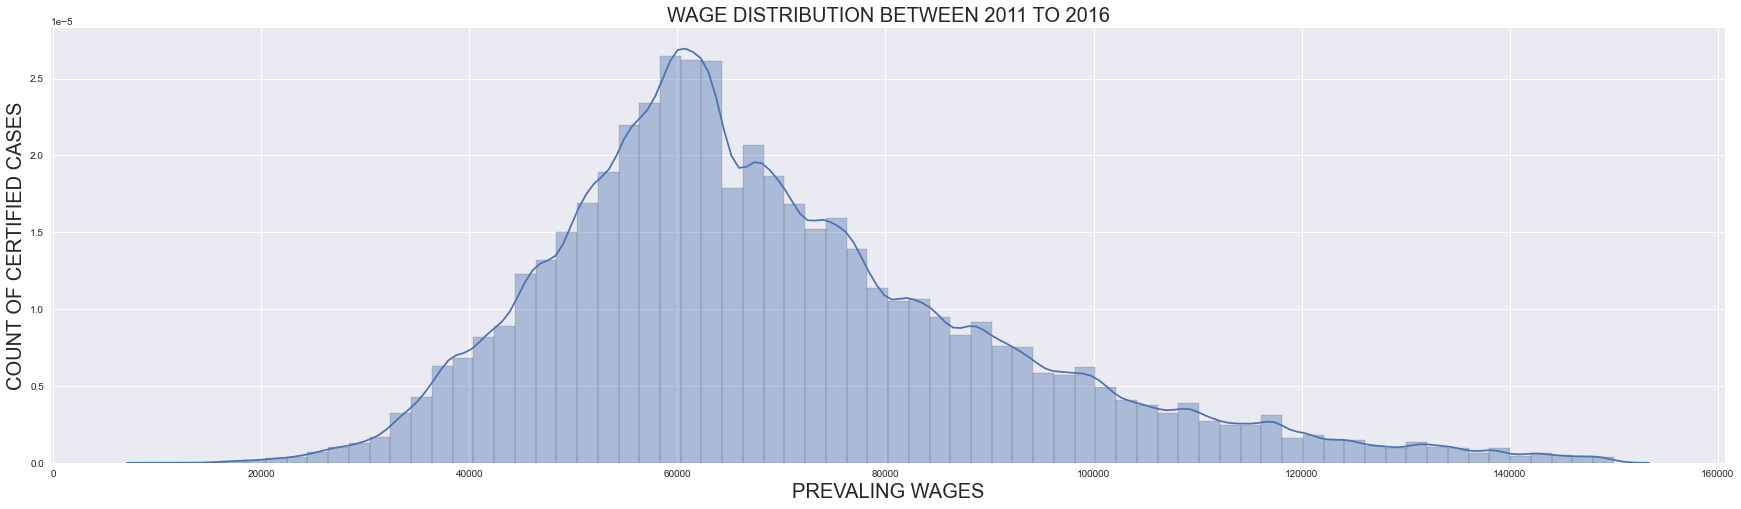

In [8]:
plt.figure(figsize=(30,8))
sns.distplot(certified_cases['PREVAILING_WAGE'],bins=70,kde=True,hist_kws={"edgecolor": "black"})
plt.xlabel('PREVALING WAGES',size=20)
plt.ylabel('COUNT OF CERTIFIED CASES', size=20)
plt.title('WAGE DISTRIBUTION BETWEEN 2011 TO 2016',size=20)

<AxesSubplot:xlabel='YEAR', ylabel='CASE_STATUS'>

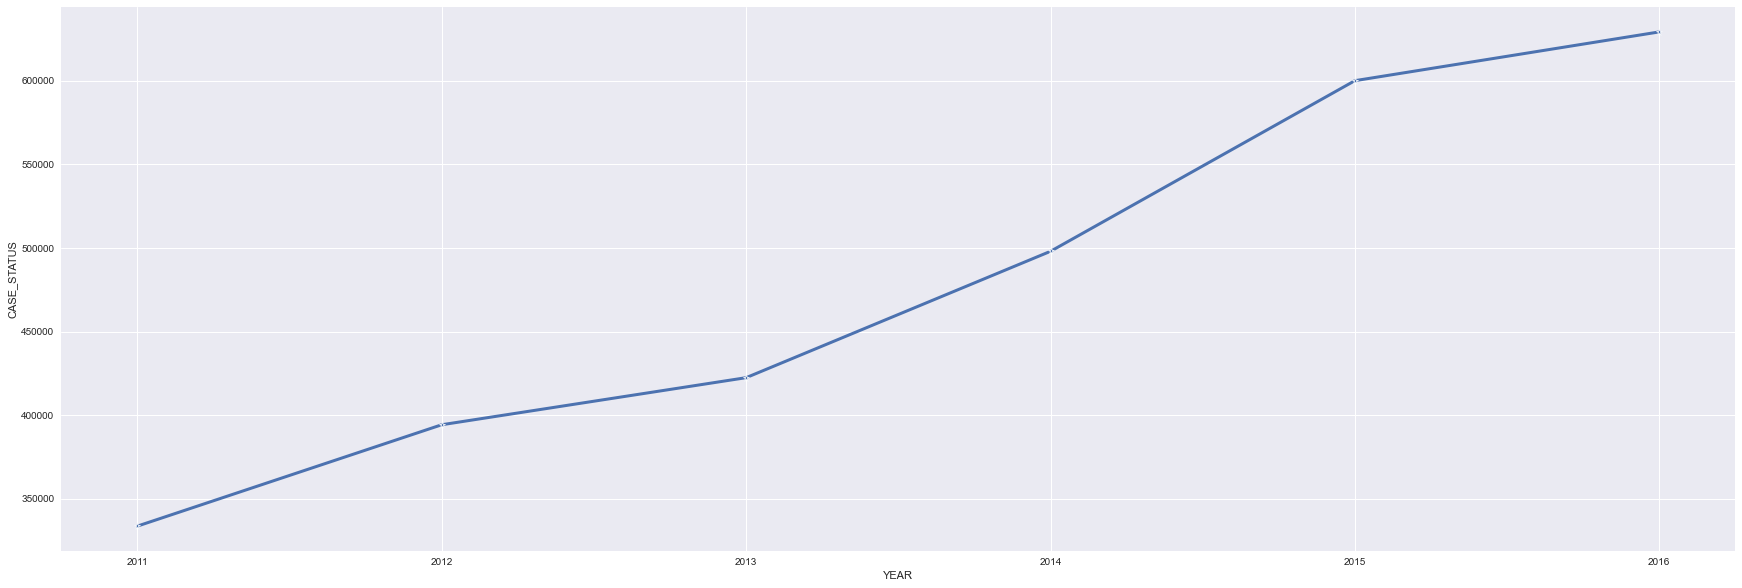

In [9]:
yearwise = df.groupby('YEAR').count()
plt.figure(figsize=(30,10))
sns.lineplot(data=yearwise['CASE_STATUS'],linewidth=3, marker='*')

In [10]:
top_twenty=certified_cases['EMPLOYER_NAME'].value_counts()[:20]
top_twenty.to_frame()

,EMPLOYER_NAME
INFOSYS LIMITED,129572
TATA CONSULTANCY SERVICES LIMITED,63801
WIPRO LIMITED,41170
DELOITTE CONSULTING LLP,35350
ACCENTURE LLP,32598
IBM INDIA PRIVATE LIMITED,27290
MICROSOFT CORPORATION,22267
"HCL AMERICA, INC.",22024
ERNST & YOUNG U.S. LLP,17724
CAPGEMINI AMERICA INC,15603


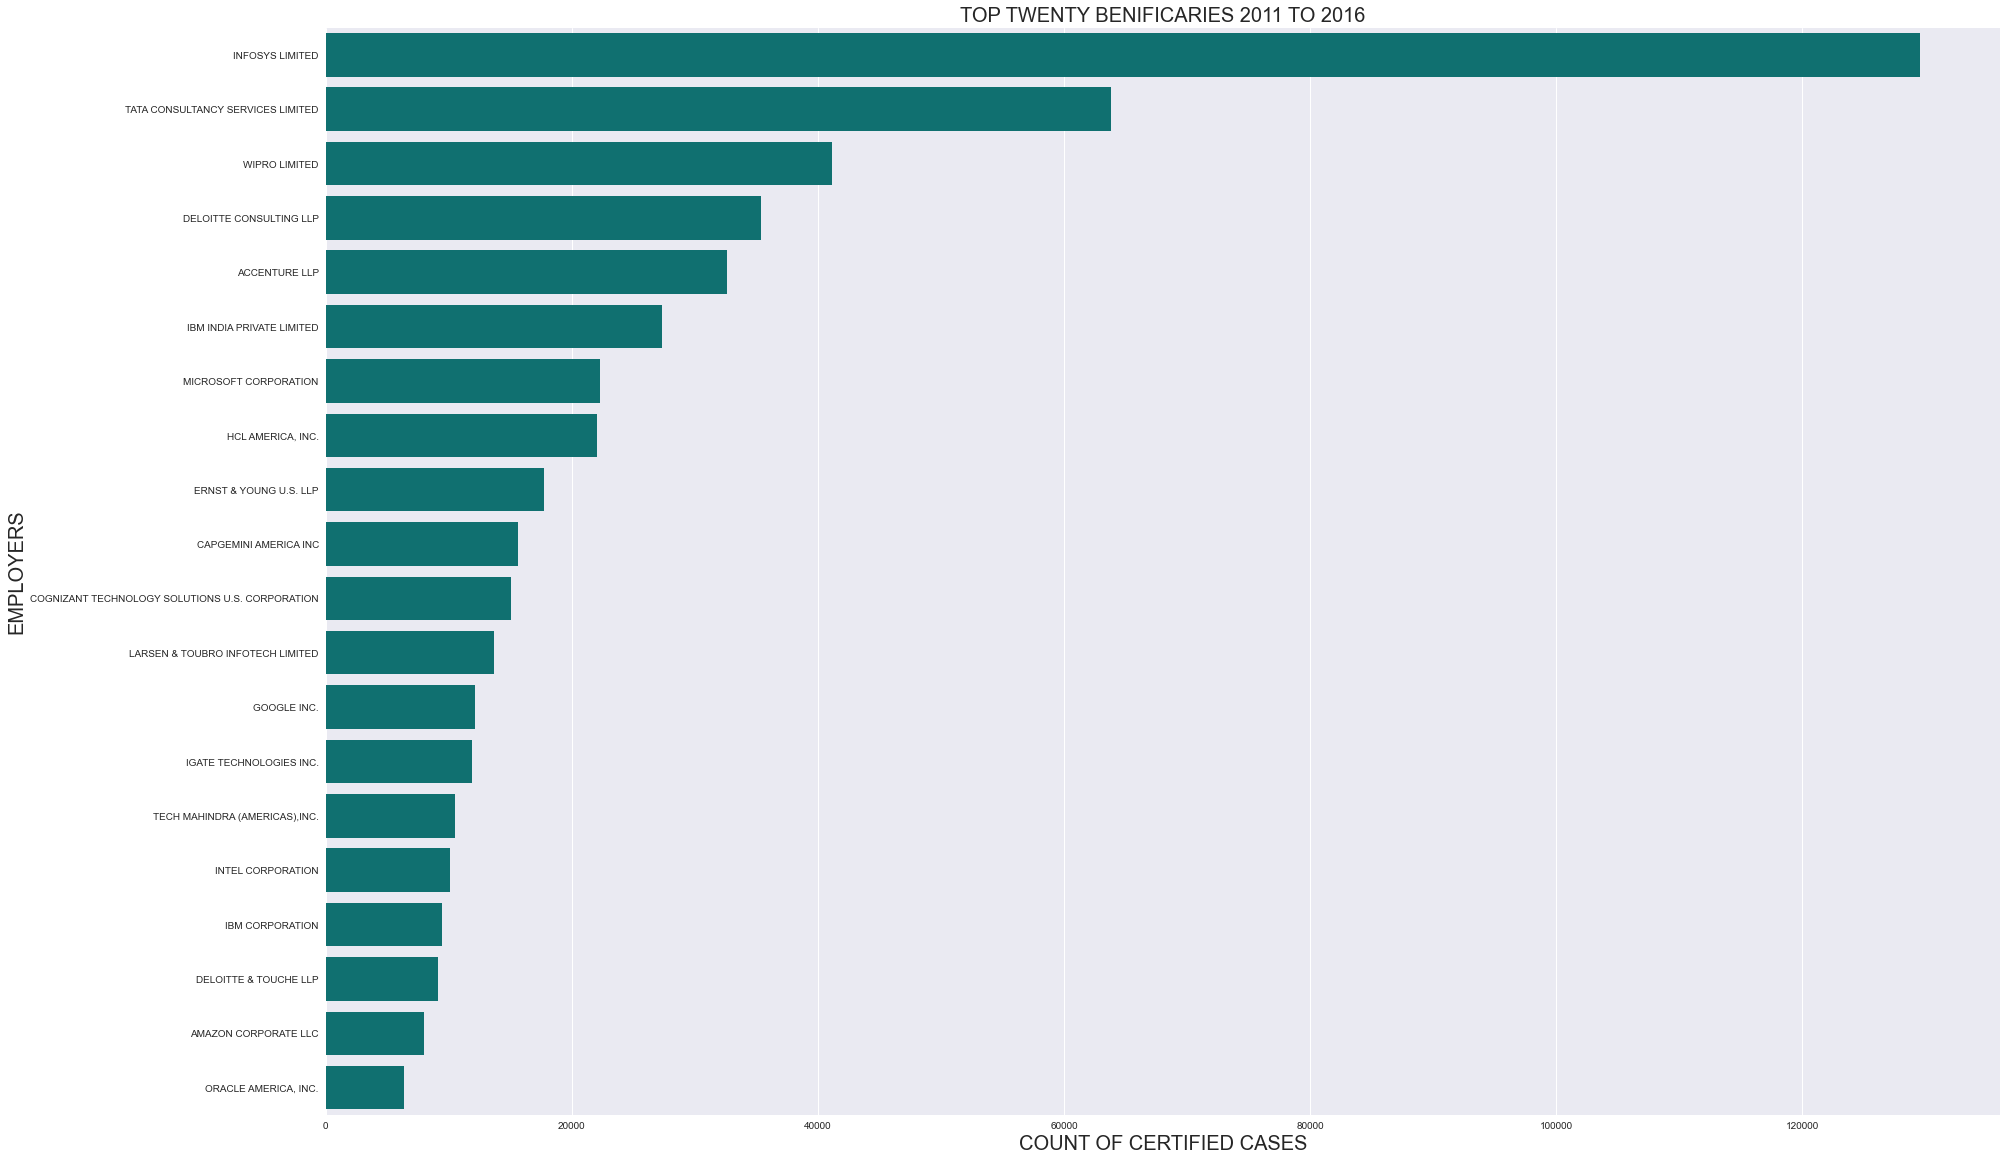

In [13]:
plt.figure(figsize=(30,20))
sns.barplot(x=top_twenty.values,y=top_twenty.index,color='teal')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('EMPLOYERS', size=20)
plt.title('TOP TWENTY BENIFICARIES 2011 TO 2016',size=20)
plt.show()

Text(0.5, 1.0, 'TOP JOB BENIFICARIES 2011 TO 2016')

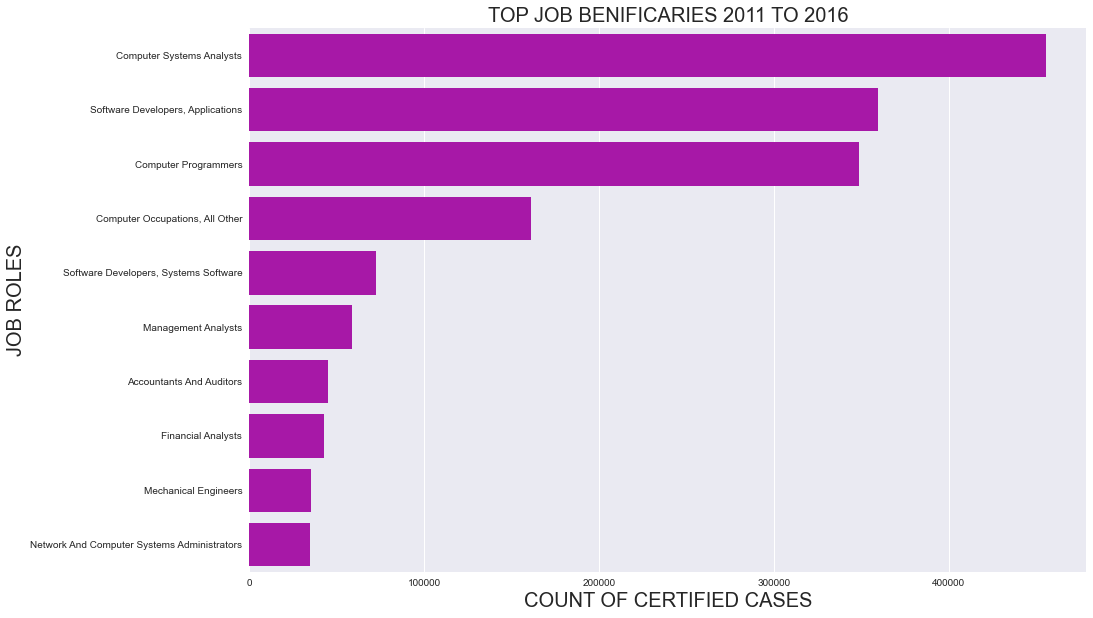

In [14]:
top_roles = certified_cases['SOC_NAME'].value_counts().head(10)
plt.figure(figsize=(15,10))
sns.barplot(y = top_roles.index ,x = top_roles.values ,color='m')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('JOB ROLES', size=20)
plt.title('TOP JOB BENIFICARIES 2011 TO 2016',size=20)

(120000.0, 145000.0)

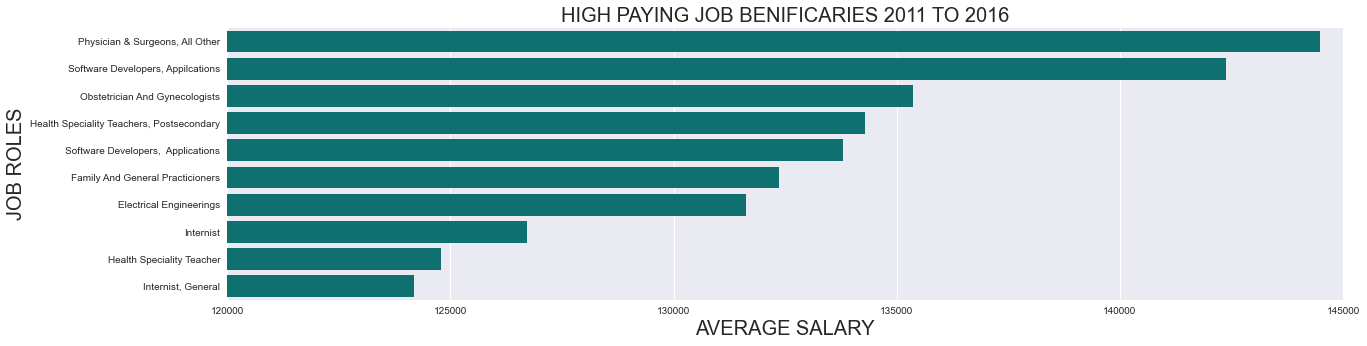

In [15]:
top_payers = certified_cases.groupby(by=['SOC_NAME'])['PREVAILING_WAGE'].mean()
top_payers = top_payers.sort_values(ascending=False)[:10]
plt.figure(figsize=(20,5))
sns.barplot(y = top_payers.index ,x = top_payers.values ,color='teal')
plt.xlabel('AVERAGE SALARY',size=20)
plt.ylabel('JOB ROLES', size=20)
plt.title('HIGH PAYING JOB BENIFICARIES 2011 TO 2016',size=20)
plt.xlim((120000,145000))